# &#x1F4DD; REPORT

# Homework &#x0031;&#xFE0F;&#x20E3; 

Homework policy: the homework is individual. Students are encouraged to discuss with fellow students to try to find the main structure of the solution for a problem, especially if they are totally stuck at the beginning of the problem. However, you should work out the details yourself and write down in your own words only what you understand yourself.


In this problem, we consider the roundtrip delay in a computer network (internet) between the computer we’re working on and another computer connected to the network. This roundtrip delay will be different, every time we send a message. As such, it can be modeled as a random variable y. For the design of network protocols and for their performance evaluation, it is important to know the distribution of this random roundtrip delay. To turn the estimation of the roundtrip delay distribution into a parameter estimation problem, we shall take a parametric distribution, parameterized by one or more parameters. Since we don’t have too much information about this variable y (except that it should be positive), we shall try several parametric distributions. In particular, we shall consider the following distributions:

$$
\text { * A Gaussian distribution: } \qquad f_G (y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}  e^{-\frac{(y−\mu)^2}{2\sigma^2}} 
$$

$$
\text { * A Rayleigh distribution: } \qquad f_R (y|\sigma^2) = 
\begin{cases}
0 & , y < 0
\\
\frac{y}{\sigma^2}  e^{-\frac{y^2}{2\sigma^2}} & , y \geq 0
\end{cases}
$$

$$
\text { * An Erlang distribution: } \qquad f_{Em} (y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\frac{\lambda^{m+1}}{m!} y^me^{\lambda y} & , y \geq 0
\end{cases} 
\\
\text{ for different values of } m \in \{0,1,2\}.
\\
\\
\text{ Remark that for m = 0 we have an exponential density: }
\\
f_{E0}(y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda y} & , y \geq 0
\end{cases}
$$

$$
\text{ * A (shifted) exponential density: } \qquad f_{exp}(y|\lambda,\alpha) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda(y - \alpha)} & , y \geq 0
\end{cases}
$$

**&#x1F516;** **(&#x2170;)** Your raw data?


In [1]:
using DataFrames, CSV

In [2]:
df = CSV.File("stats.txt") |> DataFrame;

In [3]:
using PrettyTables

In [4]:
header = (
      ["pingstats"]
    , ["[Float64]"]
);

In [5]:
xᵢ = df[!,"pingstats"]; @show xᵢ[1:3];

xᵢ[1:3] = [158.991, 152.726, 152.736]


In [6]:
pretty_table(
    first(xᵢ, 3)
    , backend=Val(:html), header = header, standalone=true)

pingstats
[Float64]
158.991
152.726
152.736


In [7]:
using Statistics
using StatsPlots

In [8]:
# Global Operations and constants
∑ = sum
𝖤 = mean # Expected Value
n = length(xᵢ) # Lenght of data used all along

100

In [9]:
using Markdown

**&#x1F516;** **(&#x2170;&#x2170;)** Estimated Parameters

&#x1F518; $\mu_G$=? ($\mu_G$)

In [10]:
Markdown.parse(raw"
#### &#x1F4DD; Gaussian Mean
```math
\mu = \frac{1}{n}\sum_{i=1}^{n}x_i \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Gaussian Mean

$$
\mu = \frac{1}{n}\sum_{i=1}^{n}x_i \qquad \{i: \in 1,\cdots,n\}
$$


In [11]:
# Compute the mean by dividing the total sum by the number of data points
μ𝐺 = 1/n * ∑([i for i in xᵢ])

# Print the calculated mean
println("The calculated mean μ of the dataset is: ", μ𝐺)

The calculated mean μ of the dataset is: 179.70369


&#x1F518; $\sigma_G$=? ($\sigma_G^2$)

In [12]:
Markdown.parse(raw"
#### &#x1F4DD; Gaussian Variance
```math
\sigma_G^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_G)^2 \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Gaussian Variance

$$
\sigma_G^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_G)^2 \qquad \{i: \in 1,\cdots,n\}
$$


In [13]:
# Calculate the variance (this is σ_G^2)
σ𝐺² = 1/(n - 1) * ∑([(i - μ𝐺)^2 for i in xᵢ]) # or σ𝐺² = var(xᵢ) if using Statistics package

581.787739630202

In [14]:
Markdown.parse(raw"
#### &#x1F4DD; Gaussian Standard Deviation
```math
\sigma_G = \sqrt{\sigma_G^2}
```
")

#### &#x1F4DD; Gaussian Standard Deviation

$$
\sigma_G = \sqrt{\sigma_G^2}
$$


In [15]:
# Calculate the standard deviation (σ_G)
σ𝐺 = √(σ𝐺²)

println("Estimated standard deviation σ𝐺 = ", σ𝐺)

Estimated standard deviation σ𝐺 = 24.120276524745773


In [16]:
Markdown.parse(raw"
#### &#x1F4DD; Gaussian Log-Likelihood
```math
\mathcal{L}_G(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
```
")

#### &#x1F4DD; Gaussian Log-Likelihood

$$
\mathcal{L}_G(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$


In [17]:
# Compute the log-likelihood 𝓛G 
𝓛𝐺 = -n/2 * log(2π * σ𝐺²) - 1/(2*σ𝐺²) * ∑((xᵢ .- μ𝐺).^2) # typed \bscrL

println("Log-likelihood 𝓛𝐺: ", 𝓛𝐺)

Log-likelihood 𝓛𝐺: -459.6991369539639


In [18]:
using Distributions

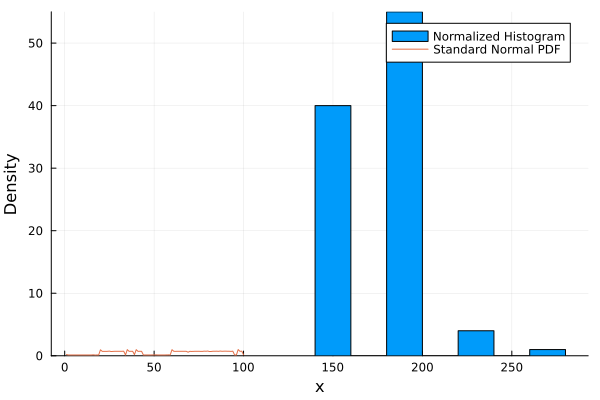

In [19]:
# Create a normalized histogram
histogram(xᵢ
    # , normalization=:probability
    , label="Normalized Histogram"
)

# To compare with a PDF, overlay the PDF on the same plot
# For example, overlaying a standard normal PDF
# plot!(Normal(0, 1), fill=(0, .5,:orange), label="Standard Normal PDF")

dist = Normal(μ𝐺, σ𝐺)

# Define a range of values over which to plot the PDF
x = 0:10:n  # Adjust the range and step as needed

# Calculate the PDF for each x value
pdf_values = cdf.(dist, xᵢ)

# Plot the PDF
plot!(pdf_values, label="Standard Normal PDF", xlabel="x", ylabel="Density")

#### &#x1F4DD; Gaussian Recap

The standard deviation $\sigma_G$ of a Gaussian distribution is the square root of the variance $\sigma_G^2$. If you have estimated the variance $\sigma_G^2$ from your dataset, then the standard deviation $\sigma_G$ can be calculated as follows:

$ \sigma_G = \sqrt{\sigma_G^2} $

If you've calculated $\sigma_G^2$ using the formula for the variance from a set of data points $x_1, x_2, ..., x_n$ (where $n$ is the number of observations):

$ \sigma_G^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_G)^2 $

Where $\mu_G$ is the mean of the data points.

Then, the standard deviation $\sigma_G$ is simply the square root of this variance:

$ \sigma_G = \sqrt{\sigma_G^2} $

This code may also calculates the variance of $x_i$ using Julia's `var` function from the `Statistics` package and then computes the standard deviation by taking the square root of the variance.

To compute the log-likelihood value $\mathcal{L}_G$ for a Gaussian (normal) distribution given a dataset, you use the log-likelihood function of the Gaussian distribution. The probability density function (PDF) of the Gaussian distribution for a single observation $y$ with mean $\mu$ and variance $\sigma^2$ is:

$ f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $

Given $n$ independent and identically distributed (i.i.d.) observations $x_1, x_2, \ldots, x_n$, the log-likelihood function $\mathcal{L}_G(\mu, \sigma^2)$ is the sum of the logarithms of the individual PDFs:

$ \mathcal{L}_G(\mu, \sigma^2) = \sum_{i=1}^{n} \log\left( \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}} \right) $

This simplifies to:

$ \mathcal{L}_G(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 $


&#x1F518; $\sigma_R$=? ($\sigma_R^2$)

To estimate the parameter $\sigma_R^2$ for a Rayleigh distribution from a dataset, we use the method of moments or maximum likelihood estimation. The variance of a Rayleigh distributed random variable is given by:

$ \sigma_R^2 = \frac{4 - \pi}{2} \sigma^2 $

where $\sigma^2$ is the parameter of the Rayleigh distribution. However, if you're looking to estimate $\sigma_R^2$ directly from data assumed to be drawn from a Rayleigh distribution, you might actually be looking to estimate $\sigma^2$ first, since $\sigma_R^2$ here refers to the variance of the distribution which is a function of $\sigma^2$.

The parameter $\sigma^2$ of the Rayleigh distribution can be estimated from the data. Given a set of $n$ independent observations $x_1, x_2, ..., x_n$ from a Rayleigh distribution, the maximum likelihood estimator (MLE) of $\sigma^2$ is:

$ \hat{\sigma}^2 = \frac{1}{2n} \sum_{i=1}^n x_i^2 $

Once $\hat{\sigma}^2$ is estimated, you can then find the estimated variance of the distribution, denoted as $\hat{\sigma}_R^2$, using the formula for the variance of a Rayleigh distribution, which is:

$ \hat{\sigma}_R^2 = \frac{4 - \pi}{2} \hat{\sigma}^2 $

To perform a similar estimation of the parameter $\sigma^2$ and consequently $\sigma_R^2$ for a Rayleigh distribution in Julia, you can follow the methodology described for MATLAB but adapt it to Julia syntax. Here's how you can estimate $\sigma^2$ (the parameter of the Rayleigh distribution) and then calculate $\sigma_R^2$ (the variance of the Rayleigh distribution) in Julia:

This Julia code snippet follows the same steps as the MATLAB version:


In [20]:
# Estimate sigma^2 (sigma squared) for Rayleigh distribution
σ̂² = 1/2n * ∑(xᵢ .^ 2)

# Calculate the estimated variance of the Rayleigh distribution
σ̂²𝑅 = (4 - π)/2 * σ̂²

# Display the estimated parameter
println("Estimated parameter σ̂²𝑅 = ", σ̂²𝑅)

Estimated parameter σ̂²𝑅 = 7053.830616871324


1. It estimates $\hat{\sigma}^2$ from the sample data using the maximum likelihood estimation formula for a Rayleigh distribution.
2. It then computes $\hat{\sigma}_R^2$, the variance of the Rayleigh distribution, based on the estimated $\sigma^2$.
3. Finally, it prints out the estimated $\sigma_R^2$.

The key differences are in the syntax used for array operations and printing output. Julia uses `.^` for element-wise squaring of the array elements, similar to MATLAB, and `println` for printing output to the console.

&#x1F518; $\lambda_{E0}$=? ($\lambda_{E0}$)

In [21]:
Markdown.parse(raw"
#### &#x1F4DD; Estimating $\lambda$ from data
```math
\hat{\lambda}_{E0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y_i}  \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Estimating $\lambda$ from data

$$
\hat{\lambda}_{E0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y_i}  \qquad \{i: \in 1,\cdots,n\}
$$


In [22]:
# Estimate λ for the exponential distribution
λ̂𝐸0 = 1 / ∑([i for i in xᵢ])

println("Estimated rate parameter λ̂𝐸0 = ", λ̂𝐸0)

Estimated rate parameter λ̂𝐸0 = 5.5647160055533644e-5


The parameter $\lambda_{E0}$ typically refers to the rate parameter of an exponential distribution, especially within the context of statistical or probability distributions. The exponential distribution is often used to model the time between events in a Poisson point process, characterized by a constant average rate of occurrence.

The probability density function (PDF) of an exponential distribution is given by:

$ f(y|\lambda) = \lambda e^{-\lambda y} \quad \text{for} \quad y \geq 0 $

where:
- $y$ is the variable,
- $\lambda$ is the rate parameter of the distribution, which is positive ($\lambda > 0$).

### Estimating $\lambda$ from Data

If you have a dataset and you want to estimate the rate parameter $\lambda$ of the exponential distribution that best fits your data, you can use the Maximum Likelihood Estimation (MLE) method. Given a sample of $n$ independent observations from an exponential distribution, $y_1, y_2, \ldots, y_n$, the MLE of $\lambda$ is given by the reciprocal of the sample mean:

$ \hat{\lambda}_{E0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y_i} $

where $\bar{y}$ is the sample mean of the observations.

### Implementation in Julia

To calculate $\hat{\lambda}_{E0}$ in Julia, you would first compute the mean of your dataset and then take its reciprocal. Here's how you could do it:

This code calculates $\hat{\lambda}_{E0}$ for a given dataset `xᵢ`, assuming that the data is drawn from an exponential distribution.



$\lambda_{E1}$=? ($\lambda_{E1}$)

$\lambda_{E2}$=? ($\lambda_{E2}$)


$\lambda_{exp}$=? (shifted exponential distribution $\lambda_{exp}$)
$\alpha_{exp}$=? ($\alpha_{exp}$)


$\sigma_{SR}$=? (shifted Rayleigh $\sigma_{SR}^2$)
$\alpha_{SR}$=? ($\alpha_{SR}$)


plot
?


log-likelihood value
$L_G$ =?

$L_R$ =?

$L_{E0}$ =?

$L_{E1}$ =?

$L_{E2}$ =?

$L_{exp}$ =?

$L_{SR}$ =?

&#x1F516; **(&#x2173;)**  In Matlab, plot a histogram of the measurements {y1, . . . , yn} you made and in the same plot superimpose the graphs for the marginal densities $f (y|\hat{\theta}_{ML,i} (Y )), i \in \{G, R, E0, E1, E2, exp,SR \}$. Make this plot for y going from a value that is somewhat smaller than the $y_{min}$ you measured to a value that is somewhat bigger than the $y_{max}$ you measured. In Matlab, use the histogram command with the options ’Normalization’ and ’probability’, so that the histogram can be compared directly to the pdf of the distributions.

In [23]:
using Plots
using Distributions
using StatsPlots  # For the `plot` function for distributions

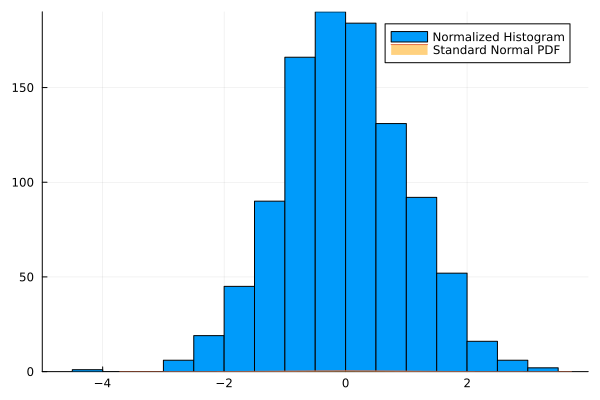

In [24]:
# Sample data: Replace `data` with your dataset
data = randn(1000)  # Example: 1000 random numbers from a standard normal distribution

# Create a normalized histogram
histogram(data, normalization=:probability, bins=30, label="Normalized Histogram")

# To compare with a PDF, overlay the PDF on the same plot
# For example, overlaying a standard normal PDF
plot!(Normal(0, 1), fill=(0, .5,:orange), label="Standard Normal PDF")